# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

In [14]:
https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

#Cheatsheet wie man Folie auf Jupyter erstellt, nur als Hilfe

SyntaxError: invalid syntax (Temp/ipykernel_24740/3063973600.py, line 1)

In [15]:
#Nicht die ganzen Codes im Jupyter haben, besser Funktionen schreiben und importieren

In [16]:
# Daten COVID 2019-2021 = 3 Jahre / Finanzkrise 2008-2010 = 3 Jahre sinnvoll?

## Kurzer Beschrieb was wir im File machen? / Inhaltsverzeichnis?

Idee: Vergleich von  SMI und fünf definierte Titeln während der Finanazkrise und der COVID-Pandemie 

- X
- X

### Get the Data

In [17]:
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
%matplotlib inline

start = datetime(2004,1,1)
end = datetime.today()
SMI= pdr.get_data_yahoo("^SSMI", start, end) 

#SMI.to_csv("SMI_ALL.csv")



In [18]:
#SMI Daten

# Moving Average of ......... 50 Day / 200 Day Base 2004-2022

Text(0.5, 1.0, 'SMI 2004-2022: Moving Average of a 50 and 200 Day Base')

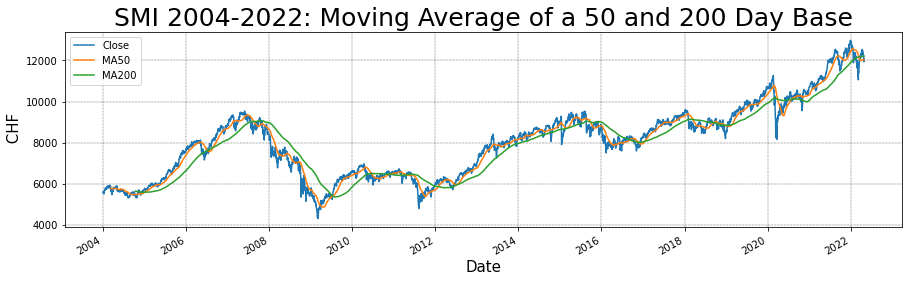

In [19]:
#Gleitender Mittelwert 50 / 200 2004 - 2022
SMI["MA50"] = SMI["Close"].rolling(50).mean()
SMI["MA200"] = SMI["Close"].rolling(200).mean()
SMI["Close"].plot(figsize = (15,4))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2004-2022: Moving Average of a 50 and 200 Day Base", fontsize = 25)

# Moving Average of ......... 50 Day / 200 Day Base 2008-2010

### Get the Data

In [20]:
#get the data
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= pdr.get_data_yahoo("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv")



Text(0.5, 1.0, 'SMI 2008-2010: Moving Average of a 50 and 100 Day Base')

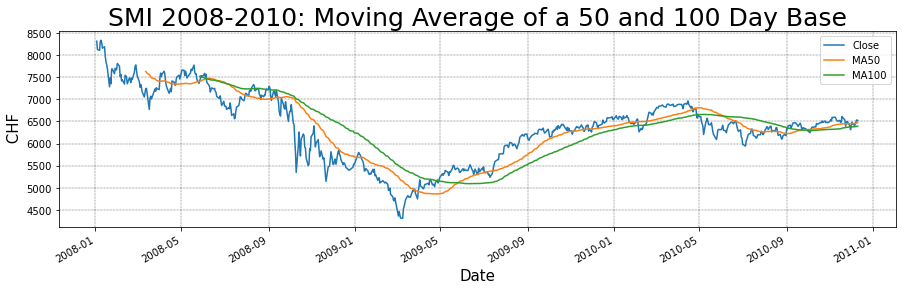

In [21]:
#plot
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA100"] = SMI_08["Close"].rolling(100).mean()
SMI_08["Close"].plot(figsize = (15,4))
SMI_08["MA50"].plot()
SMI_08["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2008-2010: Moving Average of a 50 and 100 Day Base", fontsize = 25)


# Moving Average of ......... 50 Day / 200 Day Base 2019-2021

### Get the Data

In [22]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
SMI_19= pdr.get_data_yahoo("^SSMI", start, end)
SMI_19.to_csv("SMI_19.csv")




Text(0.5, 1.0, 'Moving Average of a 50 and 100 Day Base SMI 2019-2021')

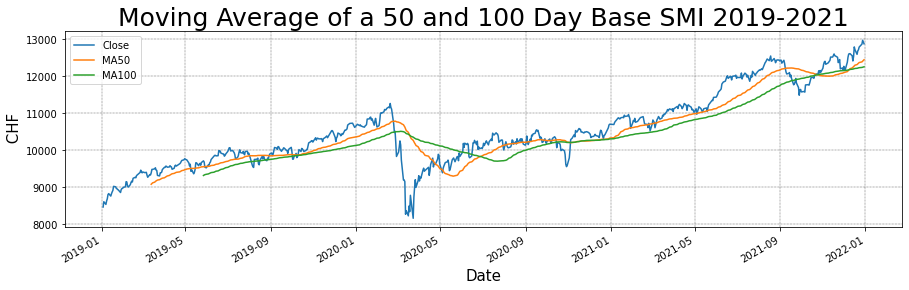

In [23]:
SMI_19["MA50"] = SMI_19["Close"].rolling(50).mean()
SMI_19["MA100"] = SMI_19["Close"].rolling(100).mean()
SMI_19["Close"].plot(figsize = (15,4))
SMI_19["MA50"].plot()
SMI_19["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Average of a 50 and 100 Day Base SMI 2019-2021", fontsize = 25)





## Mittelwert als Kennzahl 2008-2010 und 2019-2021 als Kennzahl  (macht eher wenig Sinn)

In [24]:
mean_SMI_08 = SMI_08["Close"].mean()
mean_SMI_19 = SMI_19["Close"].mean()
print(mean_SMI_08)
print(mean_SMI_19)


6356.967849915286
10520.767878706738


# Volatility Clusterting SMI 2004-2022

In [25]:
#Calculate Pct Change & Log Return
df_04 = pd.read_csv("SMI_ALL.csv",sep = ",", index_col=0)
df_04["Pct Change"]= df_04["Adj Close"].pct_change()
df_04["Log Return"]= np.log(df_04["Adj Close"]/df_04["Adj Close"].shift(1))
df_04 =df_04[1:] #Remove the first observation NaN
df_04.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2004-01-06,5588.600098,5596.600098,5551.000000,5596.600098,5596.600098,43946200,0.002490,0.002487
2004-01-07,5602.899902,5620.899902,5562.600098,5583.399902,5583.399902,53545400,-0.002359,-0.002361
2004-01-08,5609.899902,5654.700195,5599.100098,5605.100098,5605.100098,97316800,0.003887,0.003879
2004-01-09,5620.700195,5630.000000,5542.299805,5574.700195,5574.700195,64582400,-0.005424,-0.005438
2004-01-12,5532.600098,5558.200195,5496.200195,5507.700195,5507.700195,73905600,-0.012019,-0.012091


Text(0.5, 0, 'Date')

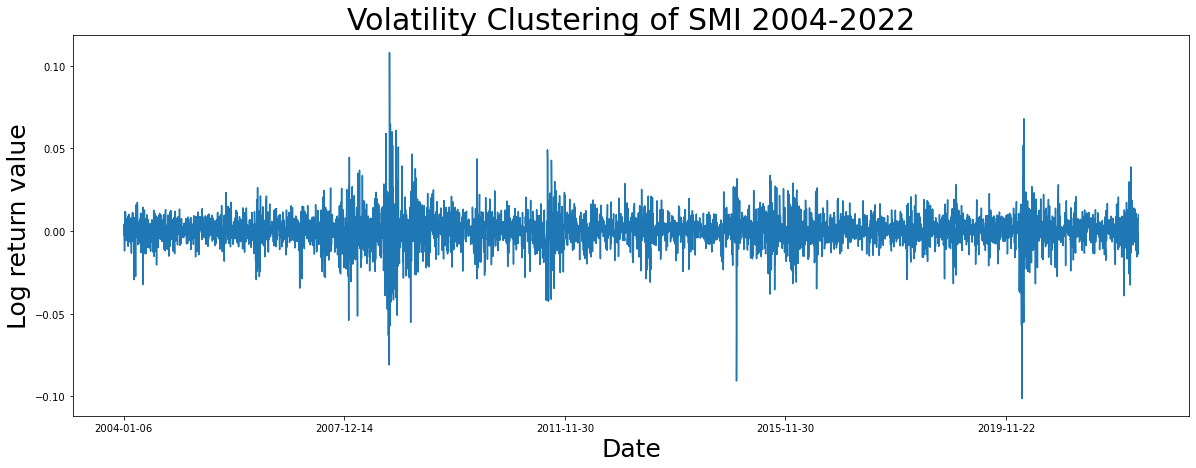

In [66]:
df_04["Log Return"].plot(figsize = (20,7))
plt.title("Volatility Clustering of SMI 2004-2022",  fontsize = 30)
plt.ylabel("Log return value", fontsize = 25)
plt.xlabel("Date",  fontsize = 25)

# Comparison Volatility SMI 2008-2010 and SMI 2019-2021

In [27]:
##Calculate pct change & log return (steady return)--> Note: pct Change and Log return calculate nearly the same values

In [61]:
df_08 = pd.read_csv("SMI_08.csv",sep = ",", index_col=0)
df_08["Pct Change"]= df_08["Close"].pct_change()
df_08["Log Return"]= np.log(df_08["Close"]/df_08["Close"].shift(1))
df_08 =df_08[1:] #Remove the first observation NaN
df_08.head()



,High,Low,Open,Close,Volume,Adj Close,Pct Change,Log Return
Date,,,,,,,,
2008-01-04,8344.299805,8109.899902,8306.700195,8130.000000,82516600,8130.000000,-0.022696,-0.022957
2008-01-07,8213.099609,8070.299805,8090.500000,8110.600098,102996500,8110.600098,-0.002386,-0.002389
2008-01-08,8385.400391,8127.600098,8128.899902,8316.400391,132311200,8316.400391,0.025374,0.025058
2008-01-09,8345.500000,8216.299805,8263.500000,8339.799805,107972400,8339.799805,0.002814,0.002810
2008-01-10,8379.299805,8227.599609,8365.700195,8290.799805,94847600,8290.799805,-0.005875,-0.005893


In [57]:
df_19 = pd.read_csv("SMI_19.csv",sep = ",", index_col=0)
df_19["Pct Change"]= df_19["Close"].pct_change()
df_19["Log Return"]= np.log(df_19["Close"]/df_19["Close"].shift(1))
df_19 =df_19[1:] #Remove the first observation NaN
df_19.head()


,High,Low,Open,Close,Volume,Adj Close,Pct Change,Log Return
Date,,,,,,,,
2019-01-04,8627.360352,8441.339844,8493.839844,8608.559570,58578200.0,8608.559570,0.016838,0.016698
2019-01-07,8617.009766,8491.500000,8616.179688,8535.950195,46142100.0,8535.950195,-0.008435,-0.008470
2019-01-08,8670.669922,8560.160156,8560.330078,8629.480469,53742100.0,8629.480469,0.010957,0.010898
2019-01-09,8700.179688,8625.400391,8661.429688,8687.709961,52999900.0,8687.709961,0.006748,0.006725
2019-01-10,8812.889648,8617.929688,8640.240234,8801.480469,52626400.0,8801.480469,0.013096,0.013011


In [30]:
# Volatilität SMI über 3 Börsenjahre in den jeweiligen Krisen (252 *3) stimmt? # Eher löschen bringt nichts

In [31]:
std_SMI_08= df_08["Log Return"].std()
std_SMI_19= df_19["Log Return"].std()
std_SMI_08_3Y = std_SMI_08 * np.sqrt(756) * 100
std_SMI_19_3Y = std_SMI_19 * np.sqrt(756) * 100

print(std_SMI_08_3Y)
print(std_SMI_19_3Y)


43.26581473111181
28.65452644105569


Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2019-2021')

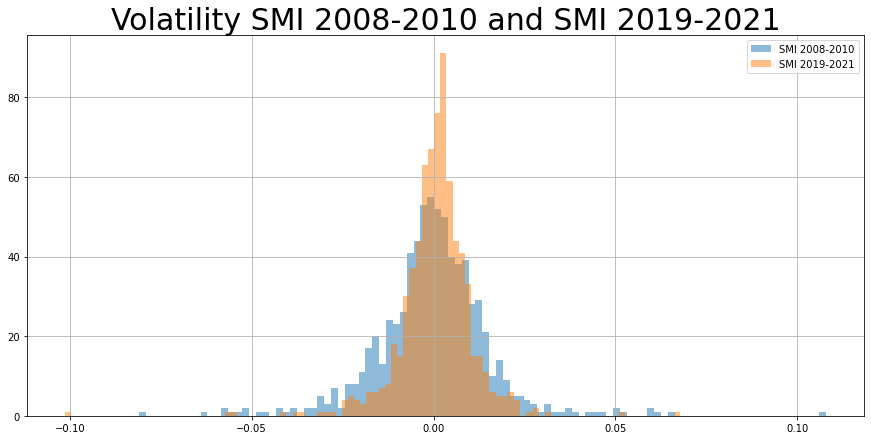

In [58]:
df_08["Log Return"].hist(bins = 100, label = "SMI 2008-2010", alpha = 0.5, figsize = (15,7))
df_19["Log Return"].hist(bins = 100, label = "SMI 2019-2021", alpha = 0.5)
plt.legend()
plt.title("Volatility SMI 2008-2010 and SMI 2019-2021", fontsize = 30)



In [33]:
#Learning: Wie man in den Kennzahlen schon sieht; SMI 08 = volatiler

# Hier beschreiben, dass wir einige Berechnungen aufzeigen mit einem Beispiel Portfolie mit 5 SMI Titeln machen


- Novartis
- UBS
- Nestlé
- Credit Suisse
- ABB

Gewichtung je 20%

# Übersicht Price Changes indexiert auf das Jahr 2004

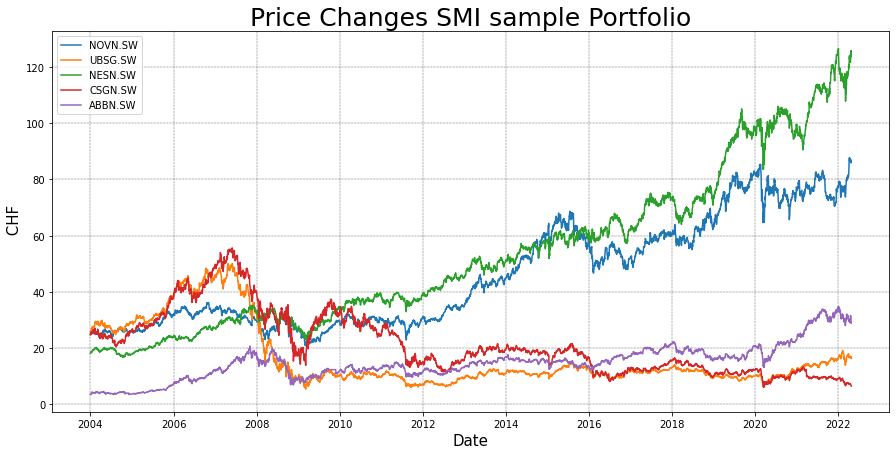

In [166]:
portfolio = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
start = datetime(2004,1,1)
end = datetime.today()
df = pdr.get_data_yahoo(portfolio, start, end)
plt.figure(figsize = (15,7))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
labels = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
plt.plot(df ["Adj Close"], label = labels)
plt.title("Price Changes SMI sample Portfolio", fontsize = 25)
plt.legend()

                                                                        




# Max Portfolio Loss (Value at Risk) der 5 auserwählten Titel des SMI (sample  Portfolio) during Financial Crisis 2008-2010 Investment = 1Mio über 3 Jahre

# wir gehen bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normalverteilt sind


## We use pct change to calculate VaR because they are quite similar to log return as you can see in the table above

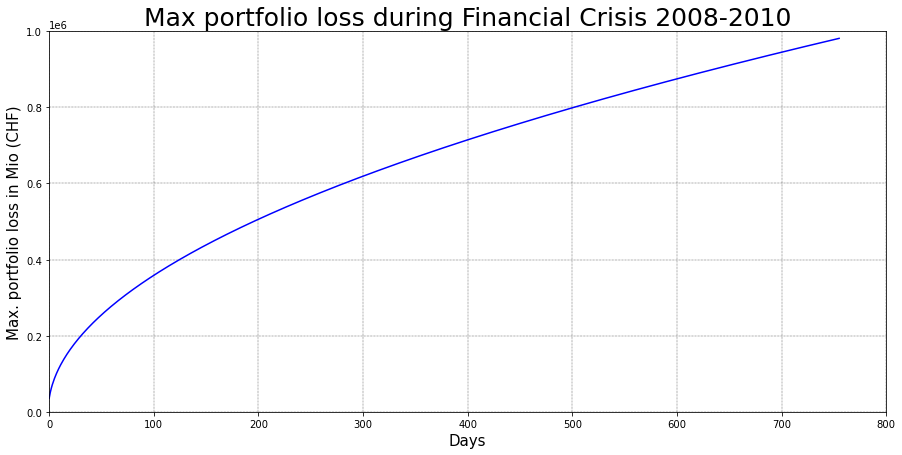

In [167]:
portfolio_08 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_08 = np.array([.2, .2, .2, .2, .2])
investment_08 = 1000000
start_08 = datetime(2008,1,1)
end_08 = datetime(2010,12,31)
df_08 = pdr.get_data_yahoo(portfolio_08, start_08, end_08) ["Adj Close"]
returns_08 = df_08.pct_change()

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_08 = returns_08.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_08 = returns_08.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_08 = mean_returns_08.dot(weights_08)

#Standard deviation of the portfolio
std_portfolio_08 = np.sqrt(weights_08.T.dot(cov_matrix_08).dot(weights_08))

#Mean of investment
mean_investment_08 = (1+mean_portfolio_08) * investment_08

#Standard deviation of investment
std_investment_08 = investment_08 * std_portfolio_08

#Konfidenzintervall (95%)
conf_level_08 = 0.05
var_cutoff_08 = norm.ppf(conf_level_08, mean_investment_08, std_investment_08) #normal cumulatice distribution
Var_08 = investment_08 - var_cutoff_08
#print(Var_08) #The portfolio had not an exceed greater loss than 35.8k


#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_08= []
days_08 = int(756)
for x in range(1, days_08+1):
    Var_array_08.append(np.round(Var_08 * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_08 * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years

plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss in Mio (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,1000000)
plt.title("Max portfolio loss during Financial Crisis 2008-2010", fontsize = 25)
plt.plot(Var_array_08, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)





In [109]:
#Plotting VaR 2008-2010


In [ ]:
#Calculating VAR

In [168]:
returns_08 = returns_08.fillna(0.0)
portfolio_returns_08 = returns_08.iloc[-days_08:].dot(weights_08)
    
VaR_08= np.percentile(portfolio_returns_08, 100 * (conf_level_08)) * investment_08
print(VaR_08) #max loss with a conf level of 95% is 32.3k

-32374.46991503913


In [ ]:
#Ploting VAR over 3 Years

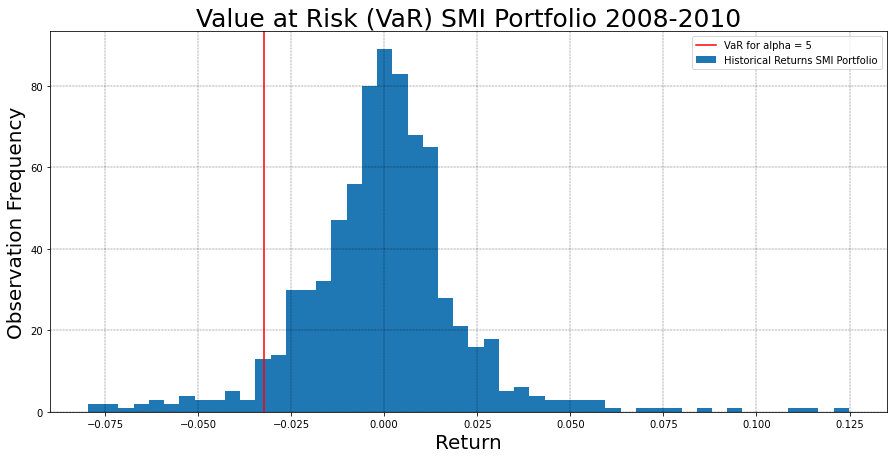

In [162]:
portfolio_returns_08 = returns_08.fillna(0.0).iloc[-days_08:].dot(weights_08)

portfolio_VaR_08 = VaR_08
portfolio_VaR_return_08 = portfolio_VaR_08 / investment_08

plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_08, bins= 50)
plt.axvline(portfolio_VaR_return_08, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5", "Historical Returns SMI Portfolio" ])
plt.title("Value at Risk (VaR) SMI Portfolio 2008-2010", fontsize = 25)
plt.xlabel("Return", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)


# #(Extra) Checking distributions of our equities against normal distribution
Wie im Abschnitt über die Berechnung erwähnt, gehen wir bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normal verteilt sind. Natürlich können wir das für die Zukunft nicht vorhersagen, aber wir können zumindest prüfen, wie die historischen Renditen verteilt waren, um zu beurteilen, ob der VaR für unser Portfolio geeignet ist

# 5 Titel im Portfolio vs Normalverteilung während der Finanzkrise 2008-2010

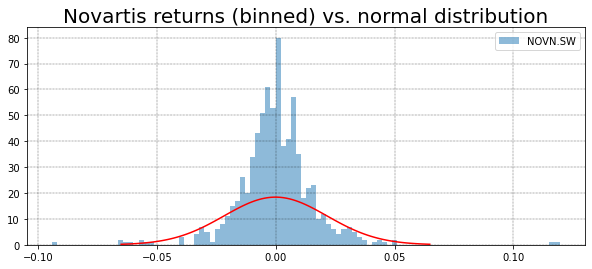

In [38]:

#Checking distributions of equities against normal distribution
import matplotlib.pyplot as plt
import scipy as scipy
returns_08["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()



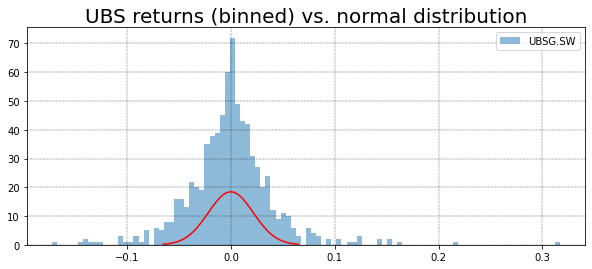

In [39]:
returns_08["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

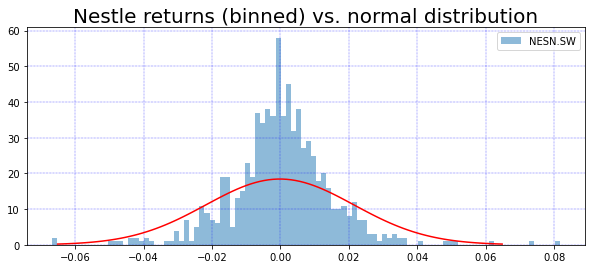

In [40]:
returns_08["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='b', linestyle='-.', linewidth=0.3)
plt.legend()

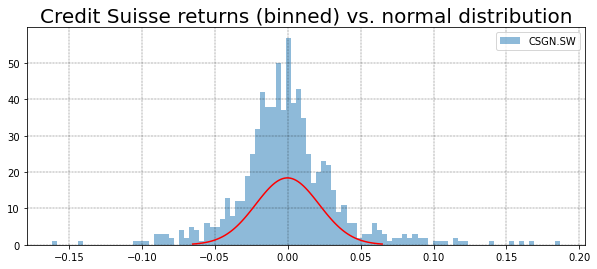

In [41]:
returns_08["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

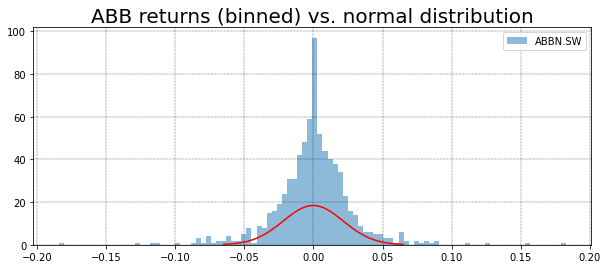

In [42]:
returns_08["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [44]:
#Daten zeigen Renditen waren annäherend normalverteilt

# Value at Risk von 5 auserwählten Titel des SMI during COVID-19 2019-2021<br>wir gehen bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normalverteilt sind

In [128]:
#VaR 5  Titel 2019-2021  during COVID
portfolio_19 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_19 = np.array([.2, .2, .2, .2, .2])
investment_19 = 1000000
start_19 = datetime(2019,1,1)
end_19 = datetime(2021,12,31)
df_19 = pdr.get_data_yahoo(portfolio_19, start_19, end_19) ["Adj Close"]
returns_19 = df_19.pct_change()

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_19 = returns_19.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_19 = returns_19.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_19 = mean_returns_19.dot(weights_19)

#Standard deviation of the portfolio
std_portfolio_19 = np.sqrt(weights_19.T.dot(cov_matrix_19).dot(weights_19))

#Mean of investment
mean_investment_19 = (1+mean_portfolio_19) * investment_19

#Standard deviation of investment
std_investment_19 = investment_19 * std_portfolio_19

#Konfidenzintervall (95%)
conf_level_19 = 0.05
var_cutoff_19 = norm.ppf(conf_level_19, mean_investment_19, std_investment_19) #normal cumulatice distribution
Var = investment_19 - var_cutoff_19
print(Var) #The portfolio had not an exceed greater loss than 21.4k



21188.674115160014


In [129]:
#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_19= []
days_19 = int(756)
for x in range(1, days_19+1):
    Var_array_19.append(np.round(Var * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(VaR * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years


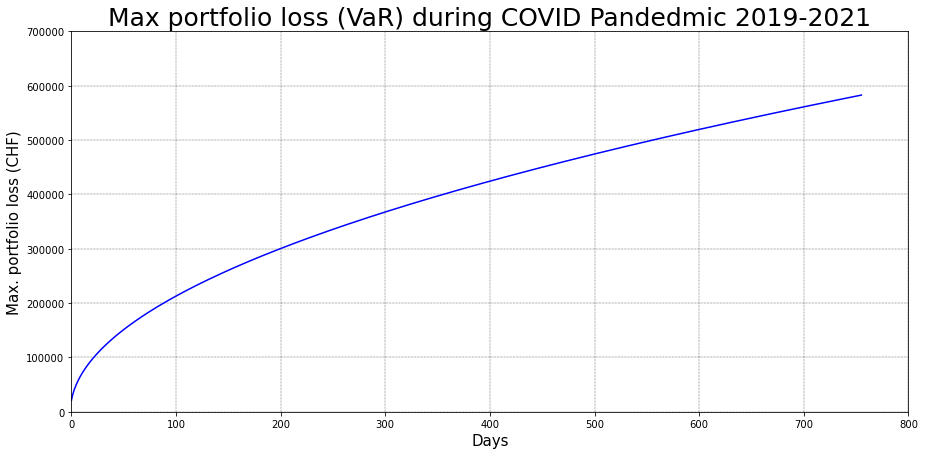

In [130]:
plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,700000)
plt.title("Max portfolio loss (VaR) during COVID Pandedmic 2019-2021", fontsize = 25)
plt.plot(Var_array_19, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)

In [122]:
#plotting VaR Verteilung?

In [154]:
returns_19 = returns_19.fillna(0.0)
portfolio_returns_19 = returns_19.iloc[-days_19:].dot(weights_19)
    
VaR_19= np.percentile(portfolio_returns_19, 100 * (conf_level_19)) * investment_19
print(VaR_19) #max loss with a conf level of 95% is 18.4k

-18435.80884779151


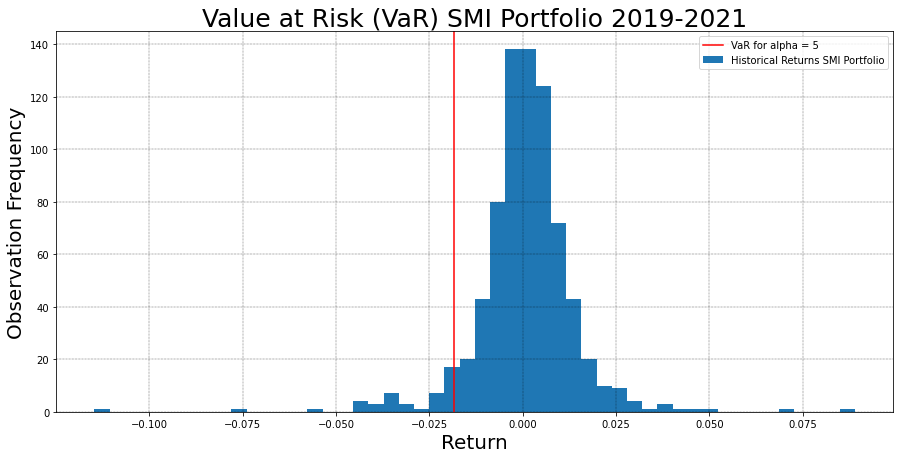

In [160]:
portfolio_returns_19_ = returns_19.fillna(0.0).iloc[-days_19:].dot(weights_19)

portfolio_VaR_19 = VaR_19
portfolio_VaR_return_19 = portfolio_VaR_19 / investment_19

plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_19, bins= 50)
plt.axvline(portfolio_VaR_return_19, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5", "Historical Returns SMI Portfolio" ])
plt.title("Value at Risk (VaR) SMI Portfolio 2019-2021", fontsize = 25)
plt.xlabel("Return", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)

# Checking distributions of equities against normal distribution
# 5 Titel im Portfolio vs Normalverteilung während der COVID-19 Pandemie 

Wie im Abschnitt über die Berechnung erwähnt, gehen wir bei der Berechnung des VaR davon aus, dass die Renditen der Aktien in unserem Portfolio normal verteilt sind. Natürlich können wir das für die Zukunft nicht vorhersagen, aber wir können zumindest prüfen, wie die historischen Renditen verteilt waren, um zu beurteilen, ob der VaR für unser Portfolio geeignet ist

In [ ]:
returns_19["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [ ]:
returns_19["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [ ]:
returns_19["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()


In [ ]:
returns_19["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle='-.', linewidth=0.3)
plt.legend()

In [ ]:
returns_19["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

In [115]:
#Daten zeigen Renditen waren annäherend normalverteilt

In [ ]:
#Sharp Ratio Portfolio SMI 2008-2010

In [163]:
#Sharp ratio Portfolio 2008-2010
returns_08 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_08 = std_portfolio_08
risk_free_return_08 = int(0.018) # Annahme
sharpe_ratio_08= (mean_portfolio_08 - risk_free_return_08) / std_08
print(sharpe_ratio_08)

-0.007642742720909455


In [164]:
returns_19 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_19 = std_portfolio_19
risk_free_return_19 = 0 # Annahme
sharpe_ratio_19= (mean_portfolio_19 - risk_free_return_19) / std_19
print(sharpe_ratio_19)

0.04890712324164552


In [114]:
y = [sharpe_ratio_08, sharpe_ratio_19]
x = ["Portfolio 2008-2010", "Portfolio 2019-2021"]

plt.figure(figsize=(10,7))
plt.bar(x, y, color=["b","g"])
plt.xlim(0,1)
plt.ylim(-0.01,0.06)
plt.ylabel("Sharpe Ratio", fontsize = (15))
plt.title("Sharpe Ratio Portfolio 2008-2010 vs 2019-2021", fontsize = (25))
plt.legend(["Portfolio 2008-2010","Portfolio 2019-2021"])
plt.xticks(x, fontsize = (15))
plt.legend(["Portfolio 2019-2021"])

#sieht scheisse aus

NameError: name 'sharpe_ratio_08' is not defined

# Conclussion

# Reflection

In [ ]:
#The last section of the report should be a reflection on your work. Which problems did you encounter and how did you solve them? What was easy, what was hard? How would you rate the end result?


# Refernces
Alle verwendeten Daten stammen von Yahoo Finance